<a href="https://colab.research.google.com/github/cfreeman22/BankChurnPrediction/blob/main/BankChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bank Churn prediction Using Neural Network
Presented By Christian Freeman May 2022

## Project Planning
## Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Reading Dataset and Feature Elimination

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.CustomerId.nunique()

10000

In [10]:
# Checking for duplicates
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
# Let's check the number of unique values in each column 

data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
data.shape

(10000, 14)

### Obeservations
- There are  10000 rows and 14 columns in the dataset
- There are no null values and no duplicates
- There are 5014 customers from France, 2509 from Germany, and 2477 from Spain
- There are 4 types of products
- The mean credit score is 650.52 and the median is 652
- The mean age is 39 with a median of 37
- The mean balance is 76485.88 and the median is 97198 
- The mean estimated salary is 100090.23 and the median is 100193.24

### Action plan
- Drop the RowNumer, CustomerId, and Surnmae because it does not add any valu e to our analysis

## Exploratory Data Analysis 

In [15]:
# importing our premade module for univariate and bivariate analysis
import wrangle 

In [18]:
cat_vars = ["Geography","Gender","Exited","IsActiveMember", "HasCrCard", "NumOfProducts" ]
target = "Exited"
cat_vars2=["Geography","Gender","IsActiveMember", "HasCrCard", "NumOfProducts" ]
quant_var = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

#### Univariate Analysis

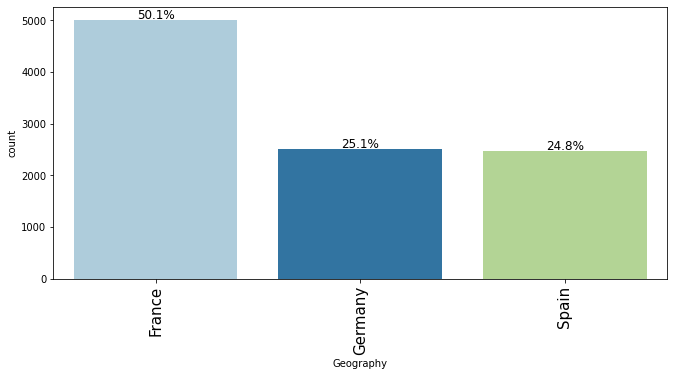

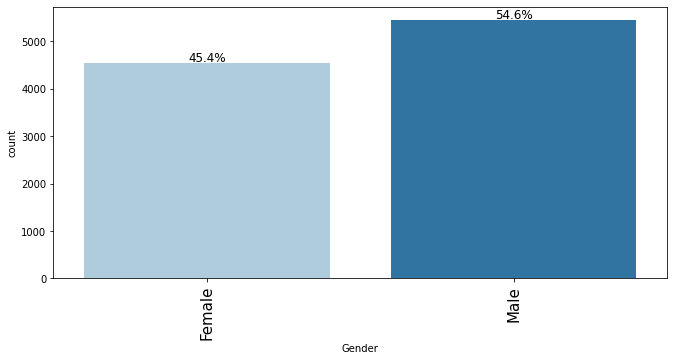

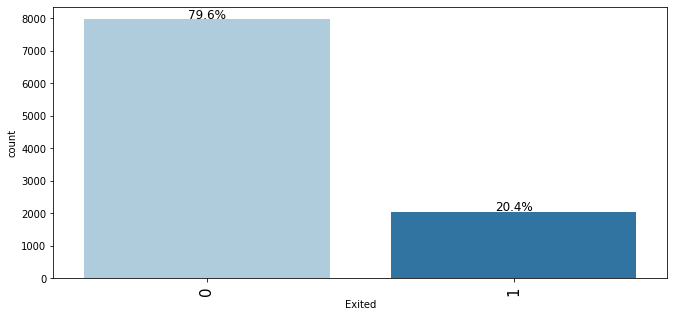

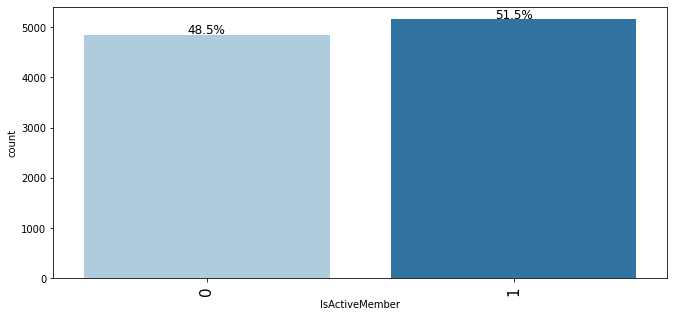

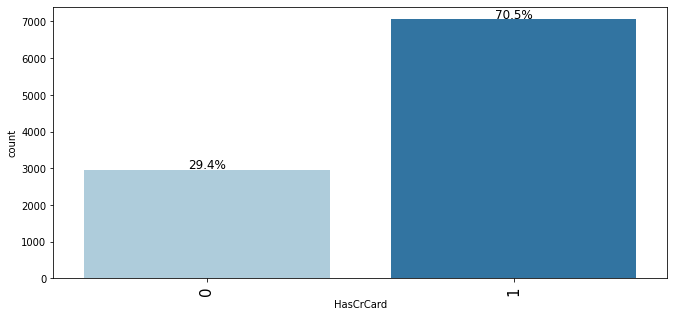

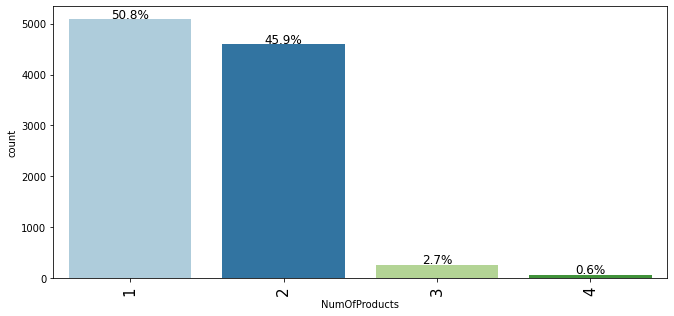

In [28]:
for x in cat_vars:
    wrangle.labeled_barplot(data, x, perc=True, n=10) #Analysing categorical variables using our predefined module stored in the wrangle file

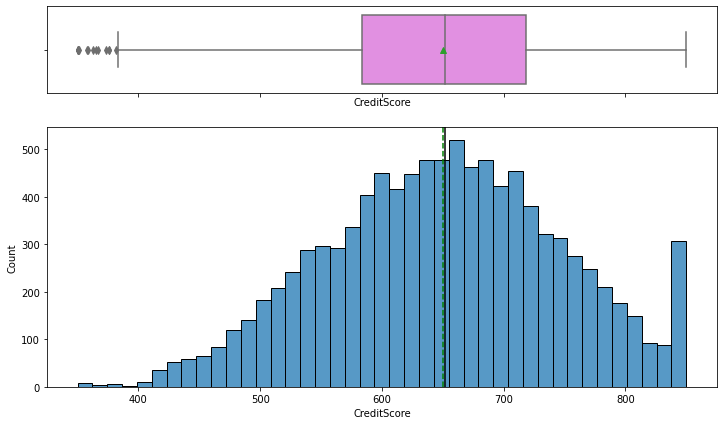

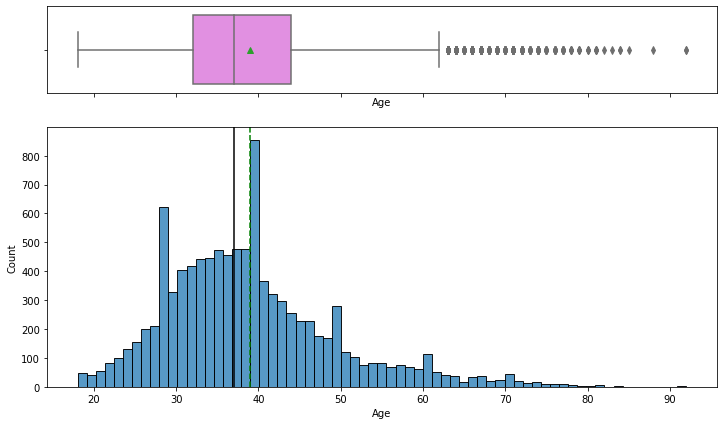

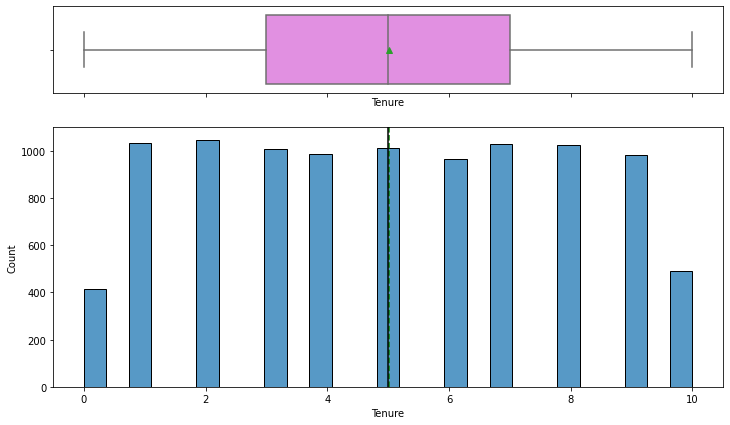

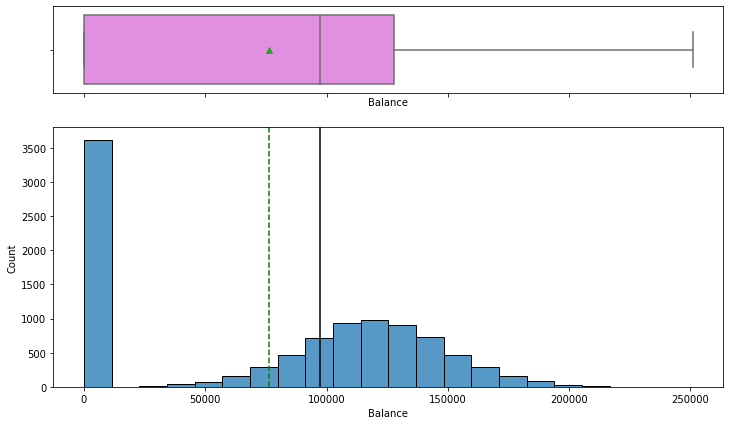

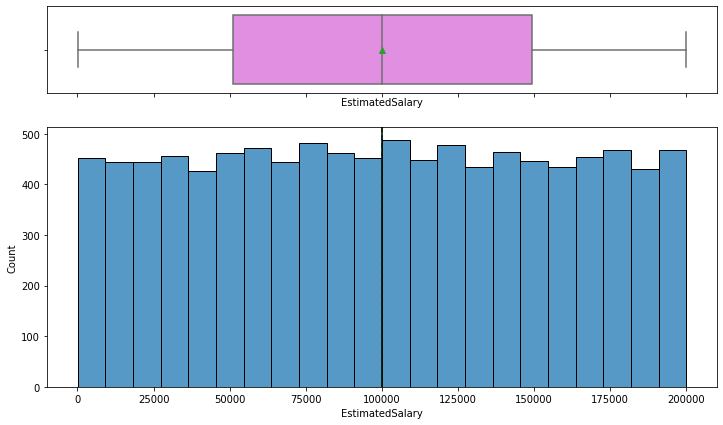

In [23]:
for x in quant_var:
    wrangle.histogram_boxplot(data, x) #Analysing numeric variables using our predefined module stored in the wrangle file

#### Takeaway from Univariate Analysis

#### Bivariate Analysis

Geography 
_____________________

         chi2       p-value  degrees of freedom
0  301.255337  3.830318e-66                   2

observed:
 Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000

expected:
            0          1
0  3992.6482  1021.3518
1  1997.9167   511.0833
2  1972.4351   504.5649


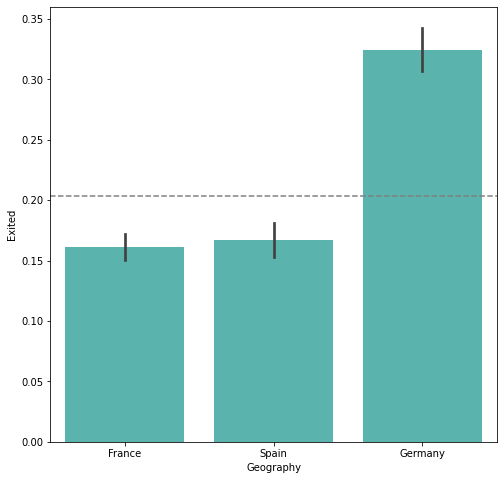


_____________________

Gender 
_____________________

         chi2       p-value  degrees of freedom
0  112.918571  2.248210e-26                   1

observed:
 Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000

expected:
            0          1
0  3617.5909   925.4091
1  4345.4091  1111.5909


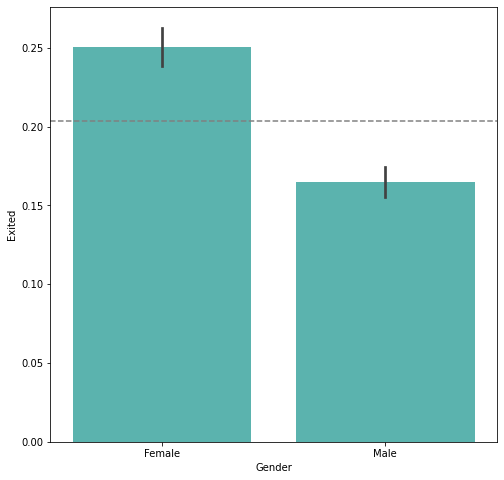


_____________________

IsActiveMember 
_____________________

         chi2       p-value  degrees of freedom
0  242.985342  8.785858e-55                   1

observed:
 Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000

expected:
            0          1
0  3861.2587   987.7413
1  4101.7413  1049.2587


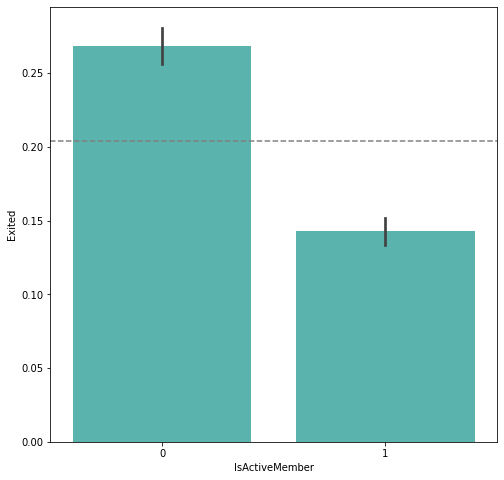


_____________________

HasCrCard 
_____________________

       chi2   p-value  degrees of freedom
0  0.471338  0.492372                   1

observed:
 Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000

expected:
            0          1
0  2345.1035   599.8965
1  5617.8965  1437.1035


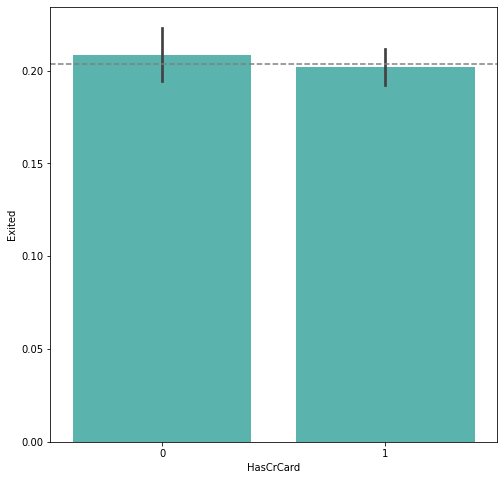


_____________________

NumOfProducts 
_____________________

          chi2  p-value  degrees of freedom
0  1503.629362      0.0                   3

observed:
 Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000

expected:
            0          1
0  4048.3892  1035.6108
1  3655.0170   934.9830
2   211.8158    54.1842
3    47.7780    12.2220


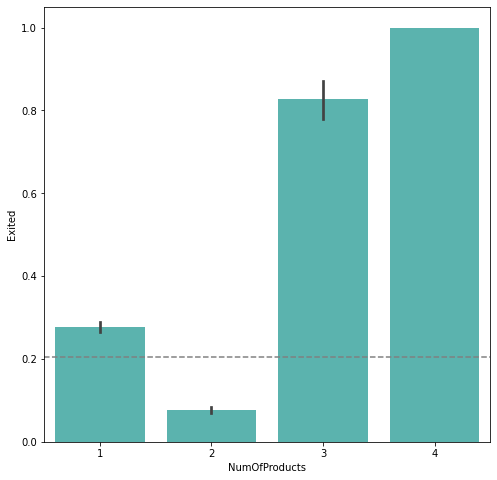


_____________________

CreditScore 
____________________



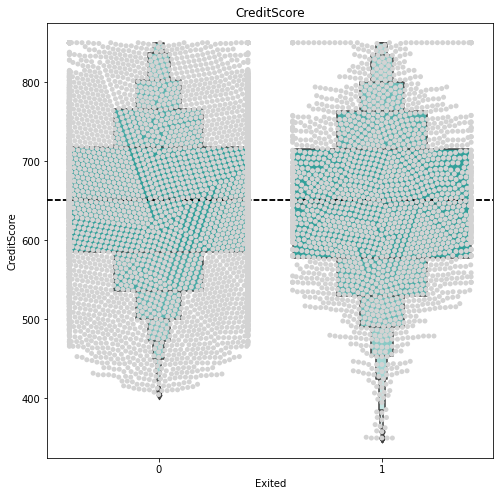

         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=8381083.0, pvalue=0.01986866117272834)

____________________

Age 
____________________



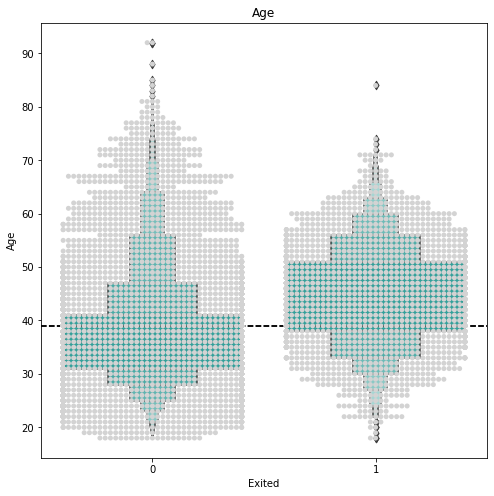

         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=4345981.5, pvalue=3.2104014319371675e-230)

____________________

Tenure 
____________________



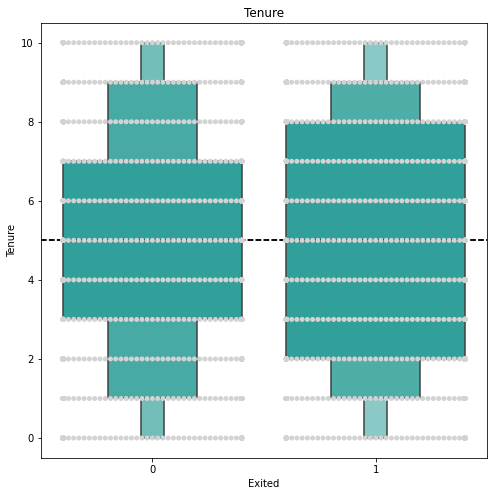

         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=8272055.5, pvalue=0.16219376122918827)

____________________

Balance 
____________________



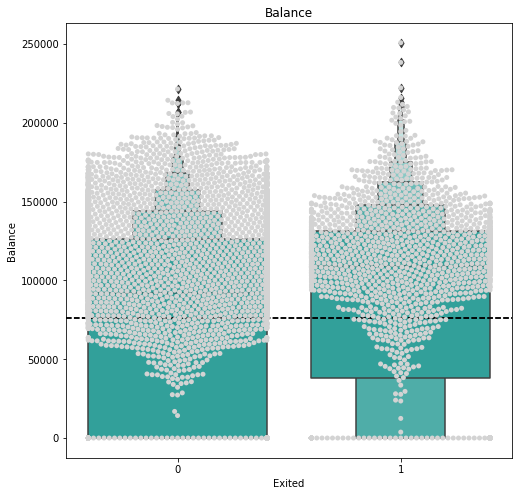

         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=6849444.5, pvalue=1.1158399379149222e-28)

____________________

EstimatedSalary 
____________________



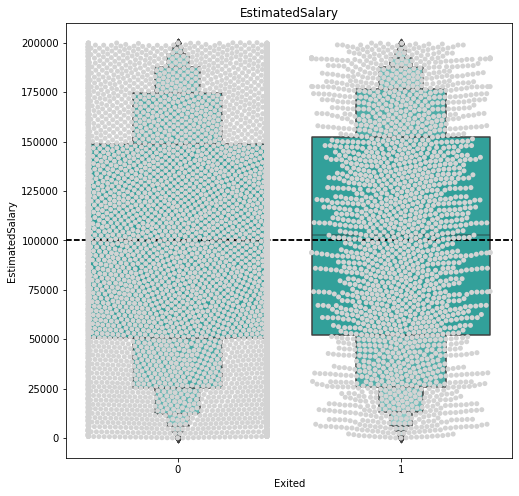

         count           mean           std    min       25%        50%  \
Exited                                                                    
0       7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148609.955  199992.48  
1       152422.910  199808.10   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=7969863.0, pvalue=0.22705150930153783)

____________________



In [29]:
wrangle.explore_bivariate(data, target, cat_vars2, quant_var)

## insights based on EDA

## Data Pre-processing

## Model building

## Model Performance Improvement

## Model Performance Evaluation

## Conclusion and key takeaways